<div style="border:solid Chocolate 2px; padding: 40px">

<b>Александр, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Введение есть, отлично)

In [274]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.stats.weightstats
from scipy import stats as st
import numpy as np

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [275]:
server_path = 'datasets/'
local_path = '/datasets/'

files = ['games.csv']

datasets = []

for file in files:
    try:
        datasets.append(pd.read_csv(server_path + file))
    except FileNotFoundError:
        datasets.append(pd.read_csv(local_path + file))

df = datasets[0]
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Давай подведем небольшой итог по обзору данных из файла? Есть ли в данных пропуски? Неправильные типы данных? Выбросы и аномалии? Явные дубилкаты?

### Шаг 2. Подготовьте данные

### Замените названия столбцов (приведите к нижнему регистру);

In [277]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично, но можешь сделать то же самое без цикла?

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

In [278]:
df[['name', 'platform', 'genre', 'rating']] = df[['name', 'platform', 'genre', 'rating']].astype(str)

В info мы увидели что во 'year_of_release' столбце есть пропуски. Подсчитаем их кол-во и заполним их - 0, до проеобразованиия столбца в int

In [279]:
df['year_of_release'].isnull().sum()

269

In [280]:
df['year_of_release'] = df['year_of_release'].fillna(0)

In [281]:
df[['year_of_release']] = df[['year_of_release']].astype(int)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Можно, но можно и удалить)

In [282]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как видим практически все данные представлены в float, но есть еще значения 'tbd' и пропуски. Пропуски заменим на -1, а 'tbd' на -2

In [283]:
df['user_score'].isnull().sum()

6701

In [284]:
df[df['user_score'] == 'tbd']['user_score'].count()

2424

In [285]:
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df['user_score'].replace('tbd', -2)
df[['user_score']] = df[['user_score']].astype(float)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Можно, но дальше будет нужно фильтровать эти заглушки, правильно? Есть более корретный метод для того, что привести тип данных в столбце с прпоусками и аномалиями. Для этого иделаьно подхоим метод to_numeric(). Настриваешь правильно параметр errors и радуешься - убирать аномалии вручную не нужно, все сделается автоматически

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Интересно, а у критиков оценки действительно с плавающей запятой?

### Обработайте пропуски при необходимости

- Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишите причины, которые могли привести к пропускам;
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

В процессе подготовки данных были обработаны пропуски.
В столбце year_of_release пропуски дат были заполнены - 0.
В столбце 'user_score' пропуски были заполнены - -1 и 'tbd' - -2. 'tbd' было решено так заполнить т.к. расшифровывается как Подлежит определению.
В столбце critic_score было решено пропуски не заполнять.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [287]:
df['all_region'] = df['na_sales'] + df['eu_sales'] + df ['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,nan,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,nan,31.38


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Сумма подчитана верно, но есть более экономный метод:
    
    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Шаг 3. Проведите исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [288]:
df_year = df.groupby('year_of_release')['name'].count().reset_index()
df_year = df_year.sort_values('year_of_release', ascending=False)
df_year = df_year[df_year['year_of_release'] > 0]
df_year.head(20)

,year_of_release,name
37,2016,502
36,2015,606
35,2014,581
34,2013,544
33,2012,653
32,2011,1136
31,2010,1255
30,2009,1426
29,2008,1427
28,2007,1197


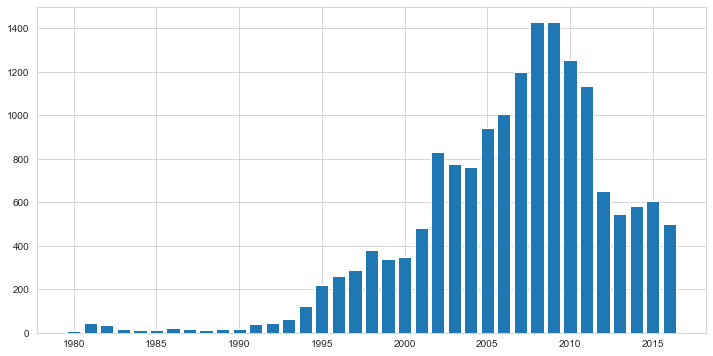

In [289]:
fig, ax = plt.subplots()
ax.bar(df_year['year_of_release'], df_year['name'])
fig.set_figwidth(12)
fig.set_figheight(6)

plt.show()

Вывод: из полученных данных видно, что пик выпуска игр пришелся на 2009 год. С начала 90-х начался резкий рост, стоит отметить что после 2009 года началось снижение. Данные есть смысл рассматривать начиная с 1990-го, ранее кол-во выпущенных игор было довольно малым.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Ага, отлично!
    

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [290]:
df_platform = df.groupby('platform')['platform'].count()
df_platform = df_platform.sort_values(ascending=False)
df_platform

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А нас инетеремует сумма? Или все же количество? Стоит ли нам работать здесь со столбцос tota_sales

Теперь посмотрим по годам, как распределяться продажи.

In [291]:
df_ps2 = df[(df['platform'] == 'PS2') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_ds = df[(df['platform'] == 'DS') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_ps3 = df[(df['platform'] == 'PS3') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_wii = df[(df['platform'] == 'Wii') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_x360 = df[(df['platform'] == 'X360') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_psp = df[(df['platform'] == 'PSP') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_ps = df[(df['platform'] == 'PS') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()
df_pc = df[(df['platform'] == 'PC') & (df['year_of_release'] > 0)].groupby('year_of_release')['name'].count().reset_index()

In [292]:
df_ps2

,year_of_release,name
0,2000,82
1,2001,185
2,2002,280
3,2003,256
4,2004,259
5,2005,260
6,2006,259
7,2007,214
8,2008,191
9,2009,96


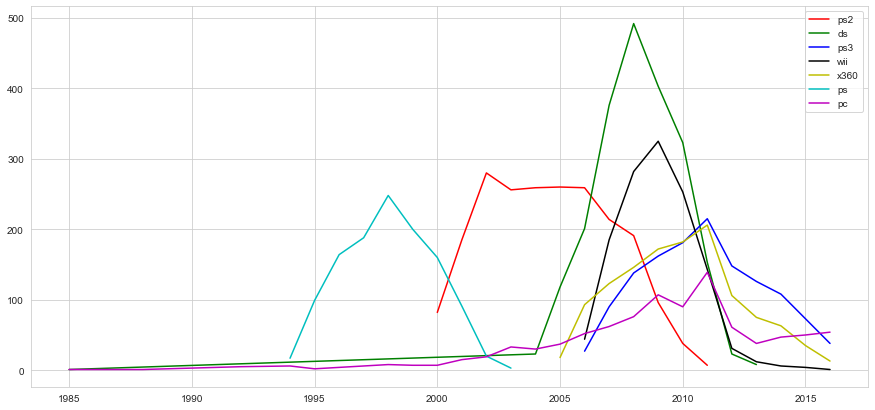

In [293]:
plt.figure(figsize=(15,7))
plt.plot(df_ps2['year_of_release'], df_ps2['name'], color='r', label='ps2')
plt.plot(df_ds['year_of_release'], df_ds['name'], color='g', label='ds')
plt.plot(df_ps3['year_of_release'], df_ps3['name'], color='b', label='ps3')
plt.plot(df_wii['year_of_release'], df_wii['name'], color='k', label='wii')
plt.plot(df_x360['year_of_release'], df_x360['name'], color='y', label='x360')
plt.plot(df_ps['year_of_release'], df_ps['name'], color='c', label='ps')
plt.plot(df_pc['year_of_release'], df_pc['name'], color='m', label='pc')
plt.legend()
plt.show()

Вывод: из полученных данных видно, что каждая платформа имеет резкий взлет и дальнейшее снижение. Стоит отметить что ps разных поколений ведет себя довольно стабильно. ds значительно всех обгоняет по кол-ву выпушенных игр, так же мы видим что ds и wii в основном имеют свои эксклюзивы. Другие же платформы получают одновременно игры. Стоит отметить что PC  ведет себя более стабильно и имеет плавный рост, так же заметен рост после снижения до 2015 года. Самая сильная конкуренция видна в период после 2010 года до 2013.
Исчезновение старых платформ и появление новых происходит примерно каждые 10 лет.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Средний срок жизни платформ определн верно!

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

За актуальный период возьмем 2000-2016 год. Выбор связан с тем что в данный период рынок видеоигр значительно вырос по сравнению с предыдущеми.Стоит отметить, что с 2000 года был сильный рост, но потом и сильное падение.

In [294]:
df_game = df[df['year_of_release'] > 1999]
df_game.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Ух ты, как много. Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Основываясь на предыдущих данных видно, что все платформы имееют сильный рост после выхода и резкое падение после. Так же заметно что поведение на платформе ps - ps3 довольно предсказуемо. На графике видно, что платформа pc, после снижение, так же начала немного рости. Исходя из вышеисхоодных данных могу выделить следующие платформы: ps и pc. Причем платформу ps выделяю не конкретное поколение, а как саму платформу, стоит отметить что в 2017 уже сть смысл начинать разрабатывать под новую версию. Еще одну платформу можно считать потенциально прибольной - xbox, т.к. данную птлатформу так же в планах обновить, что может привести к росту.

In [295]:
df_game = df_game[df_game['platform'].isin(['PS', 'PS2', 'PS3', 'X360', 'PC'])]
df_game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_region
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15
...,...,...,...,...,...,...,...,...,...,...,...,...
16702,STORM: Frontline Nation,PC,2011,Strategy,0.00,0.01,0.00,0.00,60.0,7.2,E10+,0.01
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.00,63.0,5.8,nan,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,-1.0,nan,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,nan,0.01


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Какая из этих плафторм будет поддерживаться в 2017 году?

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

<AxesSubplot:xlabel='platform', ylabel='all_region'>

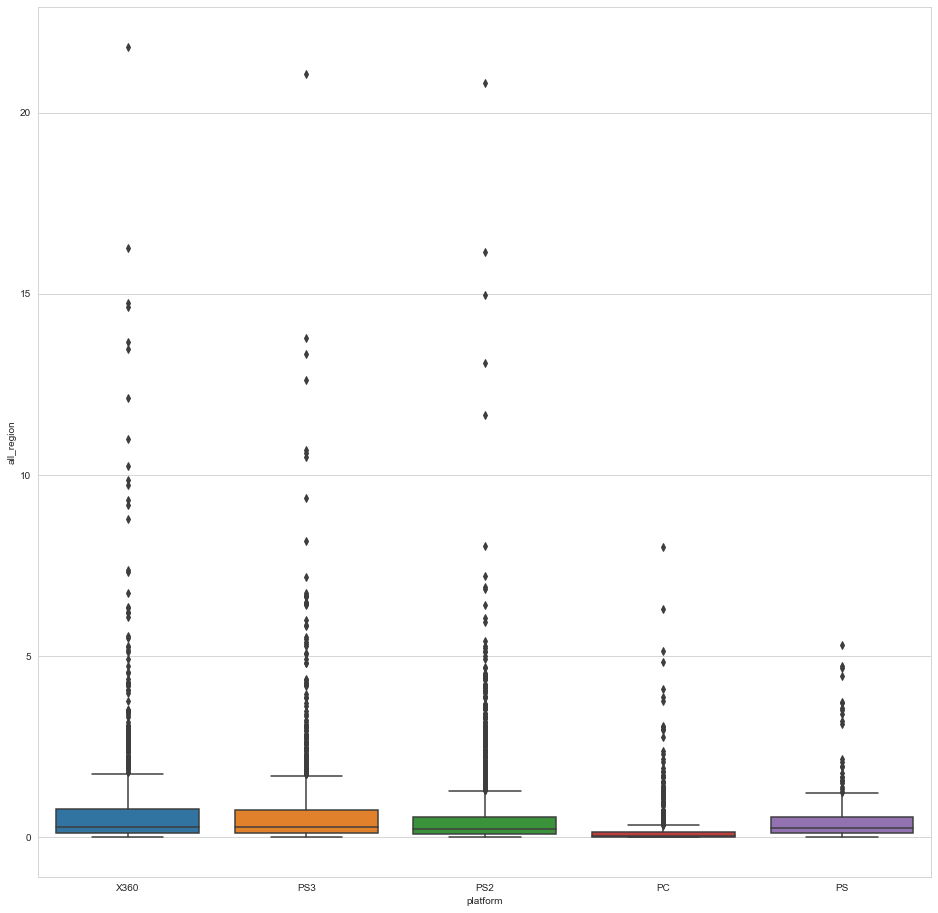

In [296]:
plt.figure(figsize=(16, 16))
sns.boxplot(x=df_game['platform'], y=df_game['all_region'])

In [297]:
df_game['all_region'].describe()

count    5856.000000
mean        0.592992
std         1.260192
min         0.000000
25%         0.070000
50%         0.210000
75%         0.580000
max        21.820000
Name: all_region, dtype: float64

<AxesSubplot:xlabel='platform', ylabel='all_region'>

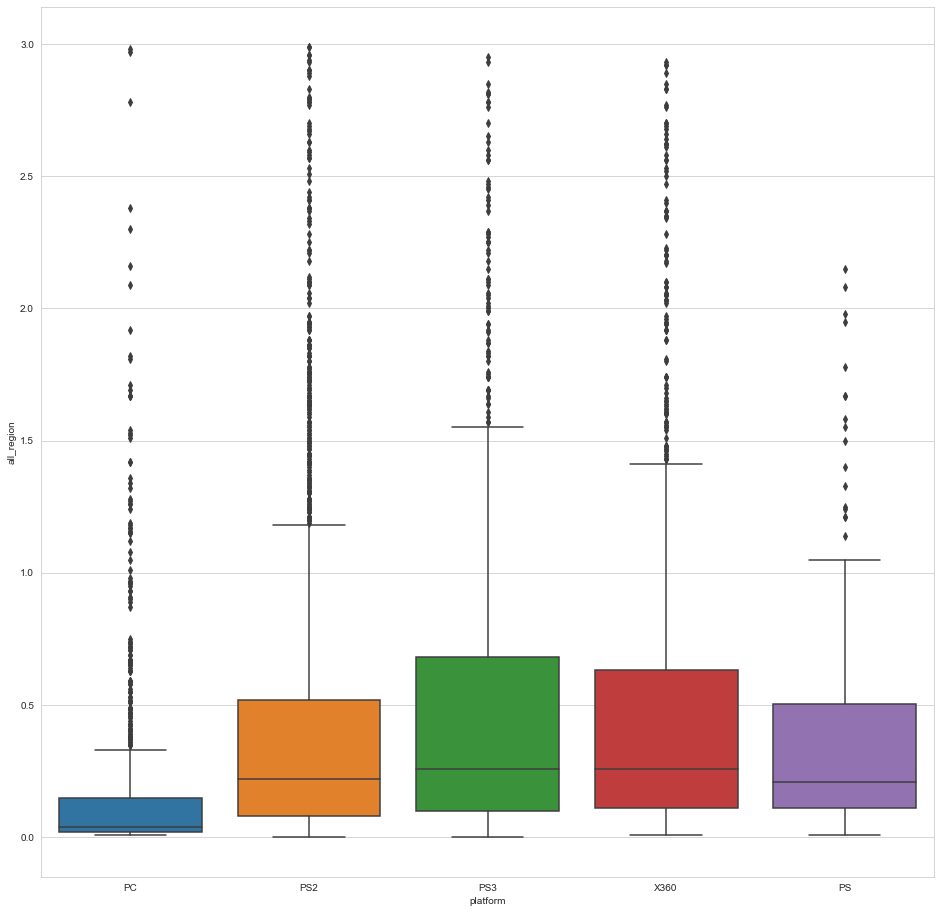

In [298]:
plt.figure(figsize=(16, 16))
df_game_shot = df_game[df_game['all_region'] < 3]
sns.boxplot(x=df_game_shot['platform'], y=df_game_shot['all_region'])

Вывод: из полученных результатов видно, что платформа pc по продажам сильно отстает от консолей. У консолей ps наблюдается рост у каждой новой платформы. x360 не сильно отстает от ps3. Во всех boxplot наблюдаются сильные выбросы в верхние границы. Данная тенденция может быть связано, что не так много сильно дорогих игровых проектов, большая часть проектов на консолях входит в районе 0.6 млн. продаж.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Боксплоты хорошие, но в них нет ни одной перспективной плафтормы :(

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [299]:
df_game_ps3 = df_game[(df_game['platform'] == 'PS3') & (df_game['user_score'] > 0)]
df_game_x360 = df_game[(df_game['platform'] == 'X360') & (df_game['user_score'] > 0)]
df_game_pc = df_game[(df_game['platform'] == 'PC') & (df_game['user_score'] > 0)]

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Упс, появились предпреждения. Для борьбы с ними могу посоветовать такой прием:
    
    import warnings

    warnings.filterwarnings("ignore")

/Users/aleksandr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_score', ylabel='all_region'>

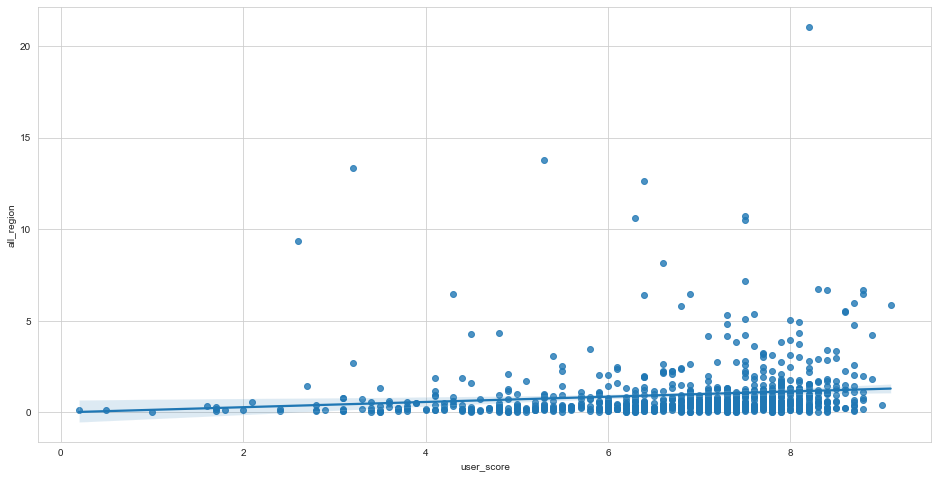

In [300]:
plt.figure(figsize=(16, 8))
sns.regplot('user_score', 'all_region', data=df_game_ps3)

/Users/aleksandr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_score', ylabel='all_region'>

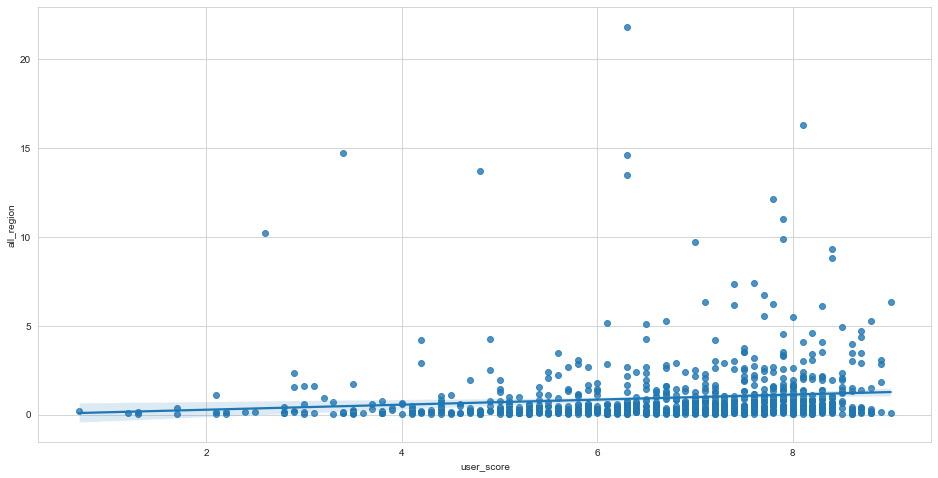

In [301]:
plt.figure(figsize=(16, 8))
sns.regplot('user_score', 'all_region',  data=df_game_x360)

/Users/aleksandr/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='user_score', ylabel='all_region'>

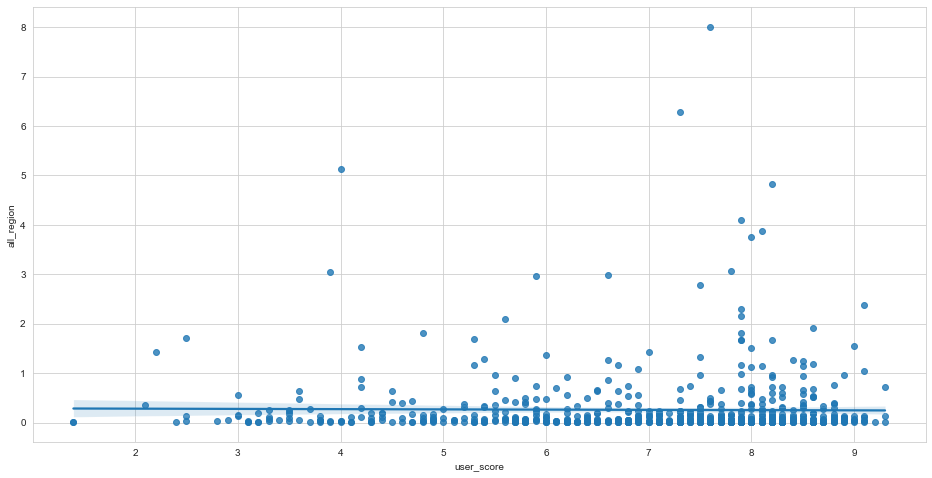

In [302]:
plt.figure(figsize=(16, 8))
sns.regplot('user_score', 'all_region',  data=df_game_pc)

In [303]:
df_game_ps3[['user_score', 'all_region']].corr()

,user_score,all_region
user_score,1.000000,0.128416
all_region,0.128416,1.000000


In [304]:
df_game_x360[['user_score', 'all_region']].corr()

,user_score,all_region
user_score,1.000000,0.114187
all_region,0.114187,1.000000


In [305]:
df_game_pc[['user_score', 'all_region']].corr()

,user_score,all_region
user_score,1.000000,-0.011438
all_region,-0.011438,1.000000


Вывод: из полученных графиков видно, что продажи в основном идут если рейтинг отзыва пользователя выше 4-х. Кол-во продаж больше если рейтинг от 6 баллов. Сильной корреляции от уровня рейтинга и кол-во продаж не наблюдается. На платформе pc корреляции совсем мала.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Давай для каждой перспективной платформы посмотрим график рассеивания и значение корреляций?

### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<AxesSubplot:xlabel='genre'>

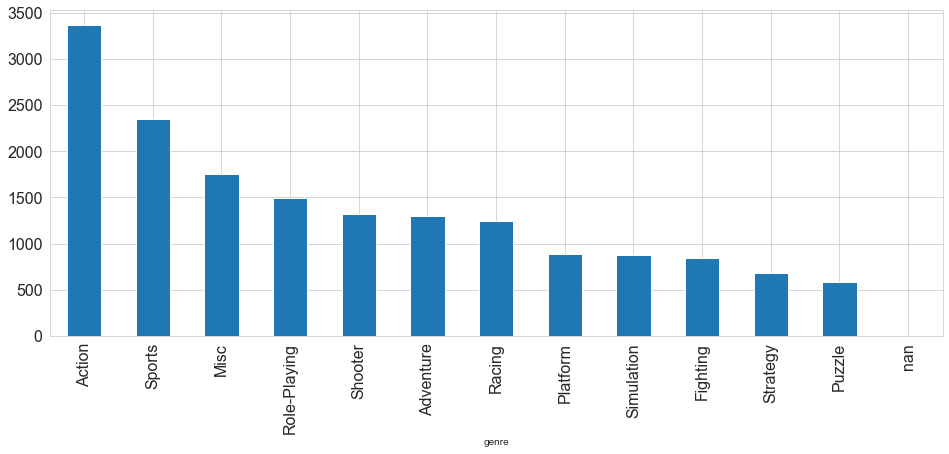

In [306]:
df.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar', figsize=(16, 6), fontsize=16)

Вывод: как видно из графика, самое большое кол-во выпускаемых игр в жанрах: action, sports, msc

<AxesSubplot:xlabel='genre'>

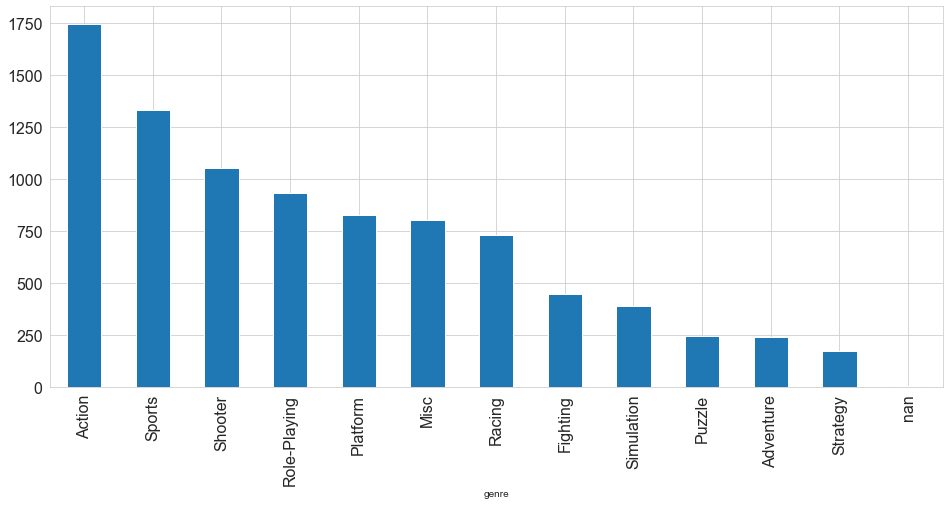

In [307]:
df.groupby('genre')['all_region'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: как видно из графика больше всего денег приносят игры в следующих жанрах: action, sports, shooter. Самые плохо продаваемы игры в жанрах: puzzle, adventure, strategy.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Стоит ли нам смотрет здесь еще и медиану?

## Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

<AxesSubplot:xlabel='platform'>

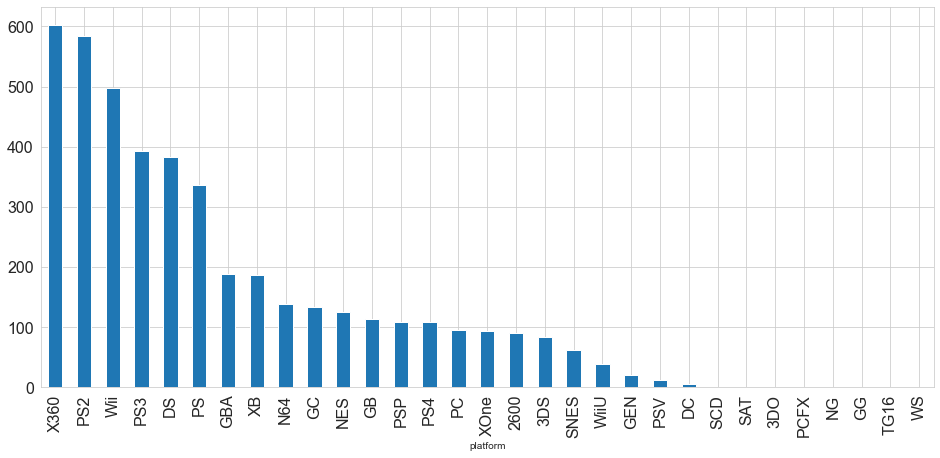

In [308]:
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='platform'>

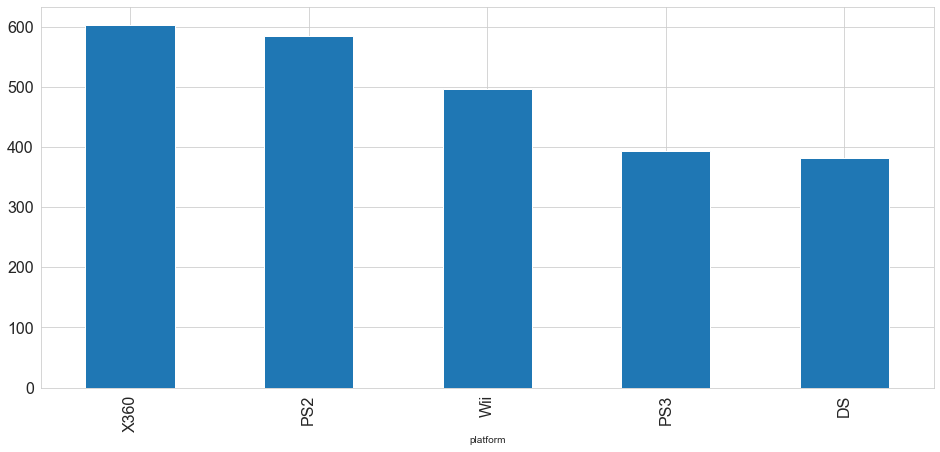

In [309]:
df_top_na = df[df['platform'].isin(['PS2', 'DS', 'PS3', 'Wii', 'X360'])]
df_top_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Как видим из диаграммы, самые популярные платформы в na x360, ps2.

<AxesSubplot:xlabel='platform'>

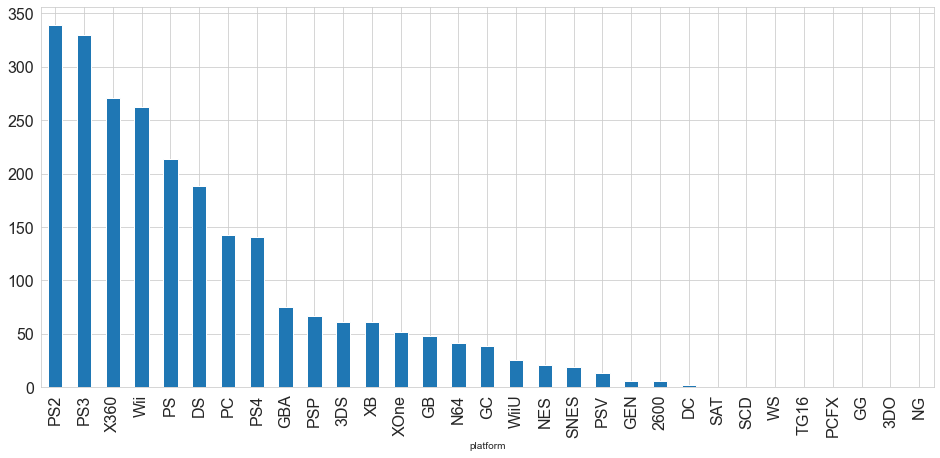

In [310]:
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='platform'>

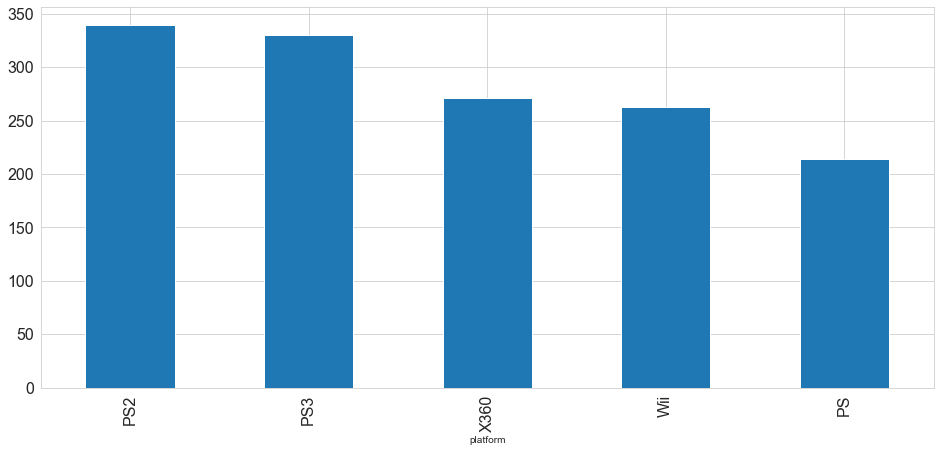

In [311]:
df_top_eu = df[df['platform'].isin(['PS2', 'PS', 'PS3', 'Wii', 'X360'])]
df_top_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: как видно в eu регионе популярные платформы ps2, ps3.

<AxesSubplot:xlabel='platform'>

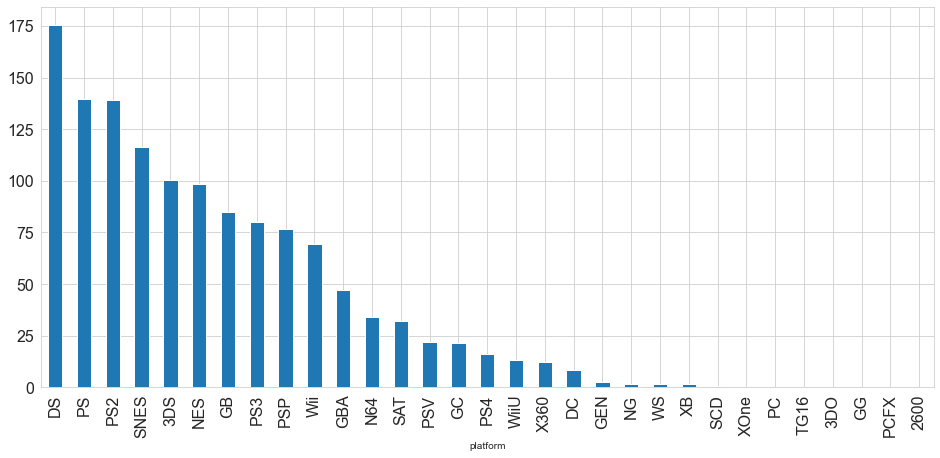

In [312]:
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='platform'>

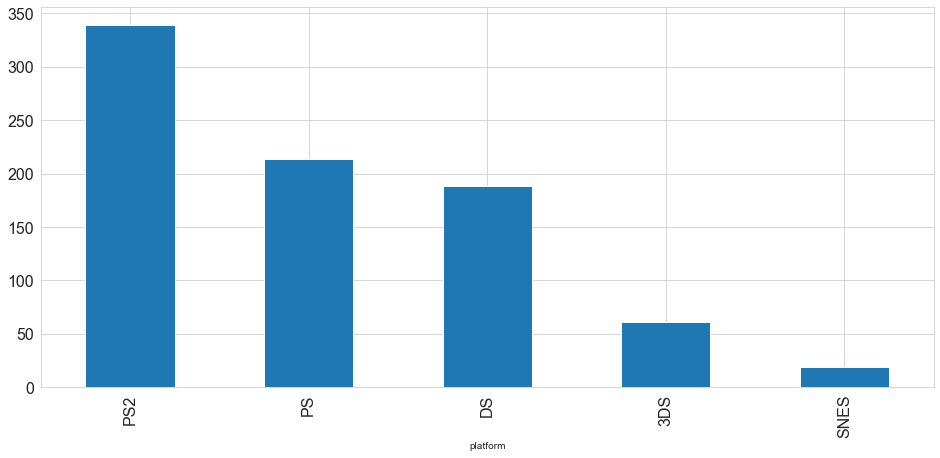

In [313]:
df_top_jp = df[df['platform'].isin(['PS2', 'DS', 'SNES', 'PS', '3DS'])]
df_top_jp.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод в jp самые популярные платформы: ps, ps2. Так же добавились две новые платформы 3ds, snes.

### Самые популярные жанры (топ-5). Поясните разницу.

<AxesSubplot:xlabel='genre'>

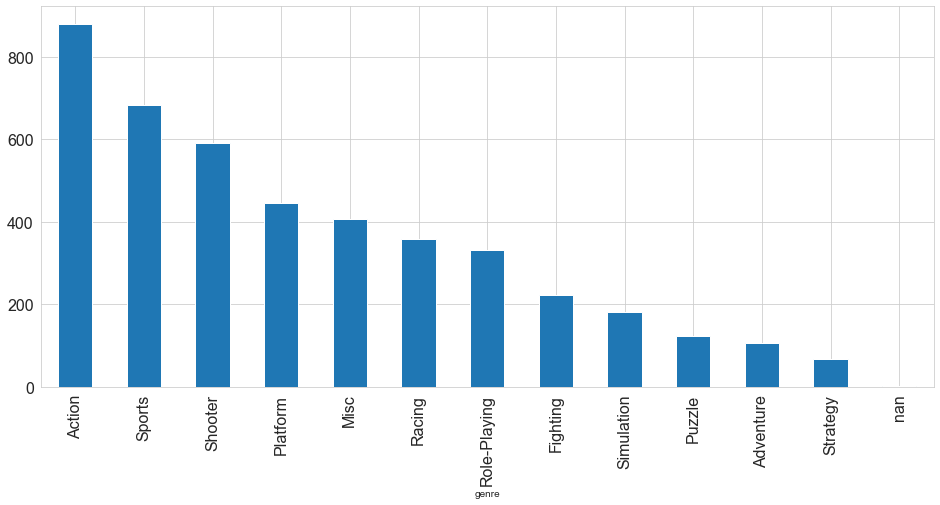

In [314]:
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='genre'>

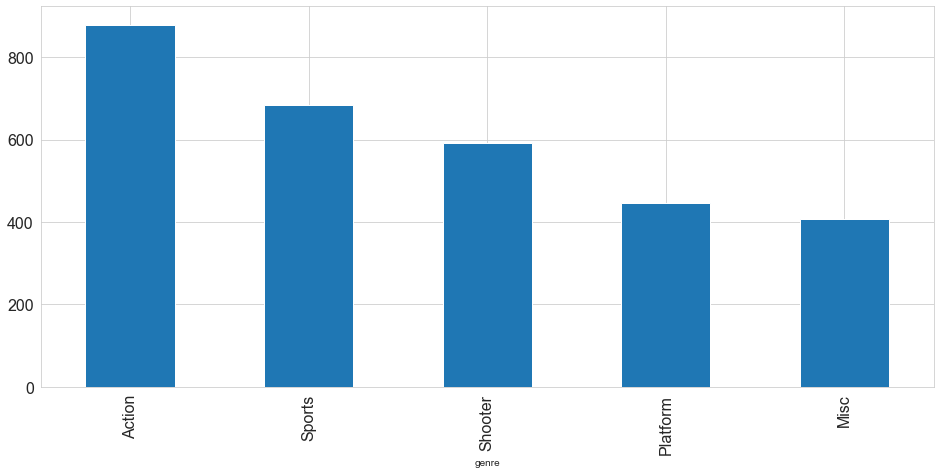

In [315]:
df_top_genre_na = df[df['genre'].isin(['Action', 'Sports', 'Shooter', 'Platform', 'Misc'])]
df_top_genre_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: как видно из диаграммы, самый популярный жанр action.

<AxesSubplot:xlabel='genre'>

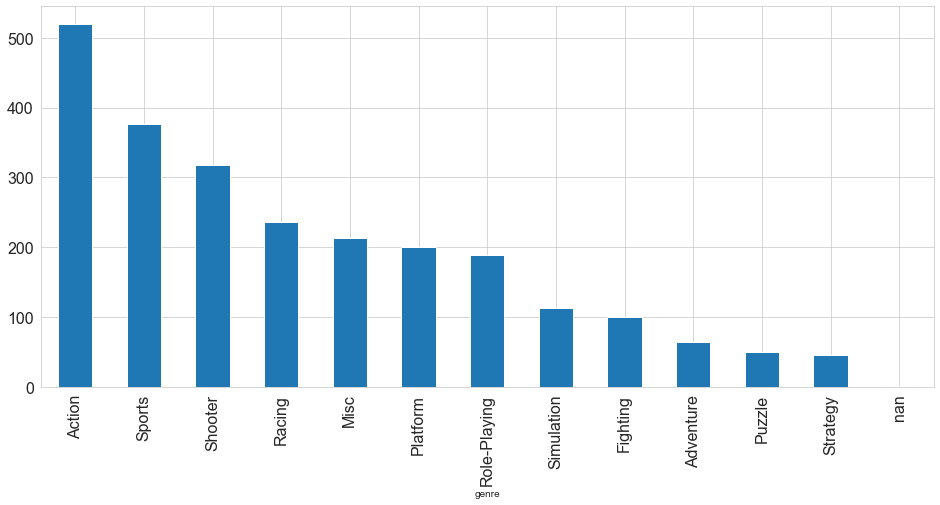

In [316]:
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='genre'>

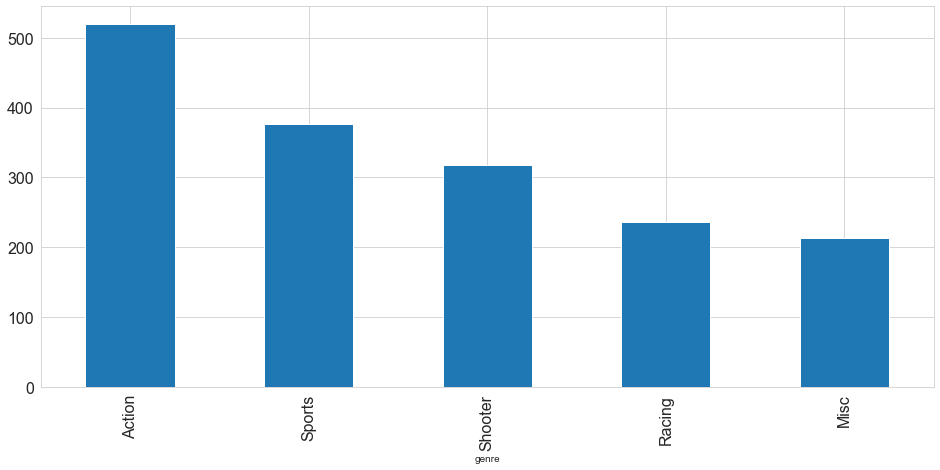

In [317]:
df_top_genre_eu = df[df['genre'].isin(['Action', 'Sports', 'Shooter', 'Racing', 'Misc'])]
df_top_genre_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: как видно из диаграммы, самый популярный жанр в регионе eu - action.

<AxesSubplot:xlabel='genre'>

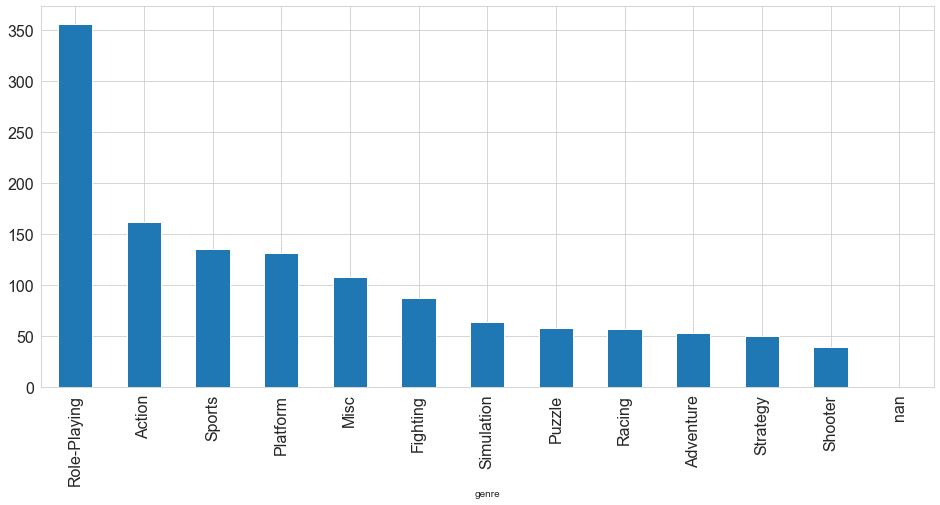

In [318]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='genre'>

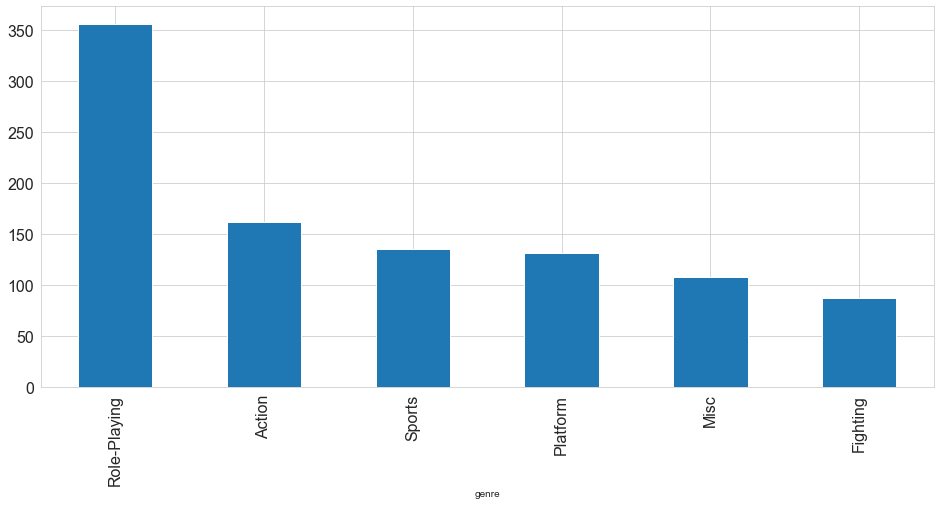

In [319]:
df_top_genre_jp = df[df['genre'].isin(['Role-Playing', 'Action', 'Sports', 'Platform', 'Misc', 'Fighting'])]
df_top_genre_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: в регионе jp самый популярный жанр оказался role-playing, а action оказался на втором месте с сильным разрывом от первого.

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рейтинг игр ESRB основан на их содержании аналогично рейтинговым системам кинофильмов. Рейтинг игры напечатан на упаковке, содержится в её рекламе и указан на сайте игры. Компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки.

Рейтинг состоит из двух частей: знака рейтинга и краткого описания содержимого. Знак рейтинга обычно располагается в нижнем левом или правом углу на лицевой стороне упаковки и определяет наиболее подходящую возрастную категорию для игры. Описание содержимого располагается на обратной стороне коробки, обычно в нижнем левом или правом углу и перечисляет некоторые элементы содержания игры

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. Некоторые усложнённые развивающие игры могут иметь рейтинг «Everyone»:

«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio, выпущенная в 1996 году. Первоначально "K-A" ("Kids to Adults"):

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать или немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.

«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики:

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории:

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. Большинство таких игр предназначено для персональных компьютеров под управлением Microsoft Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры. Первой игрой, которая получила данный рейтинг, стала The Joy of Sex, выпущенная в 1993 году:

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу:

ESRB 2013 Rating Pending.svg
«RP 17+» («Rating Pending») — «Рейтинг ожидается - примерно 17+»: Продукт отправлен ESRB на оценку, но примерное содержание близко к рейтингу «M». Данная маркировка была введена с 2021 г. и распространяется на демо или презентационный вариант

ESRB 2013 Rating Pending Likely Mature 17 +.svg


<AxesSubplot:xlabel='rating'>

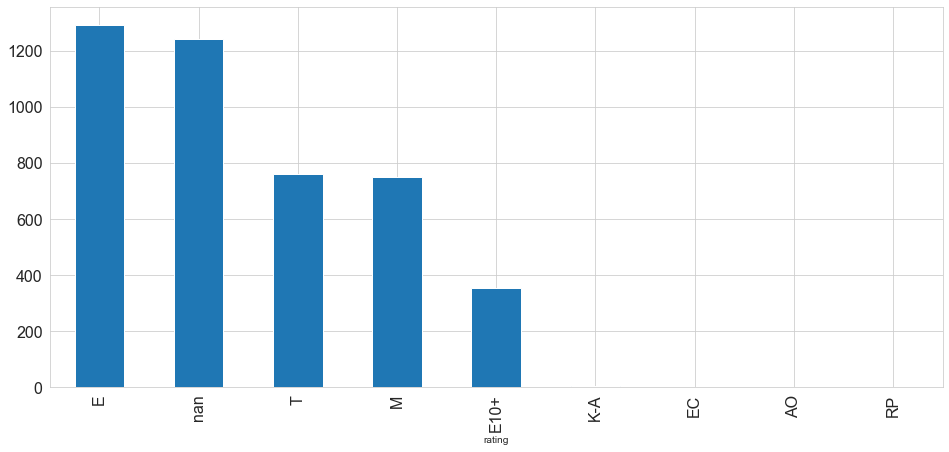

In [320]:
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='rating'>

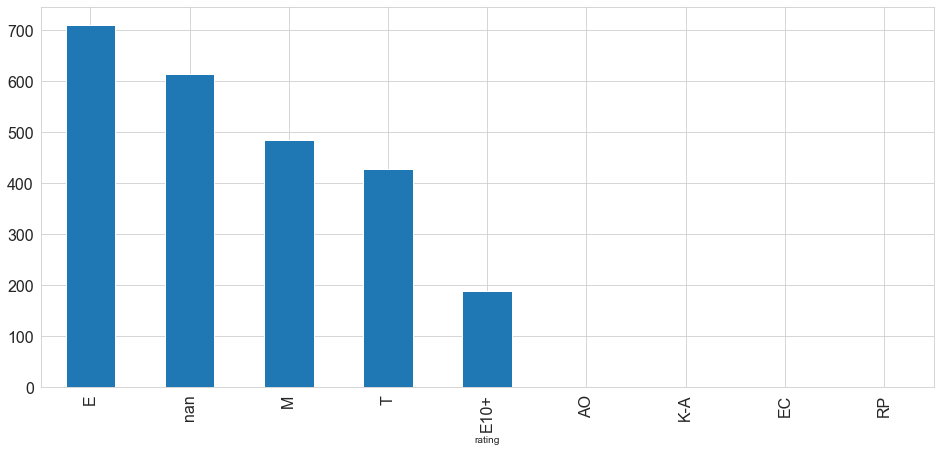

In [321]:
df.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

<AxesSubplot:xlabel='rating'>

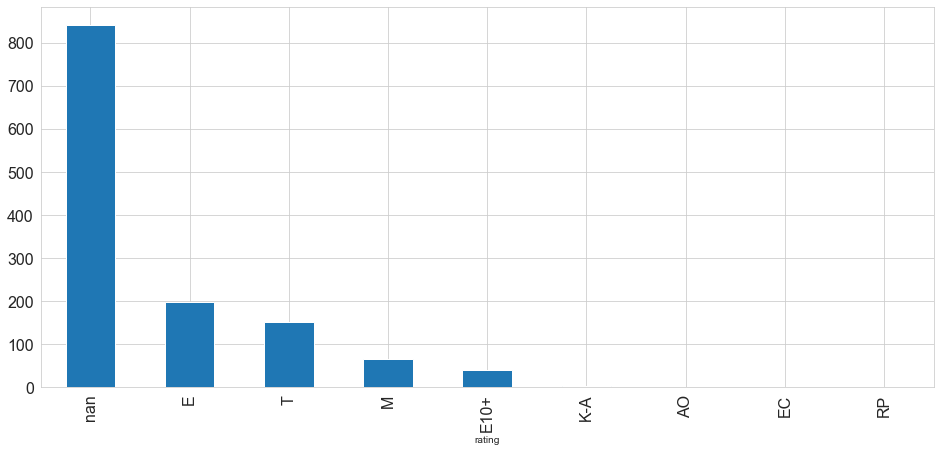

In [322]:
df.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(16, 7), fontsize=16)

Вывод: как можно увидеть из полученных данных, игры с рейтингом Е (для всех) являются самыми продаваемыми, кроме региона jp. Данный факт скорее всего можно объяснить региональными особенностями рынка. Так же стоит отметить что на 2-3 месте крепко закрепились игры с рейтингом Т(игры для подростков) и М(игры для взрослыз)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b> Актуальный период нас очень подводит

## Шаг 5. Проверьте гипотезы

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


 Для проверки гипотез необходимо нормальное распределение, сохраним данные > 0 т.к. пропуски мы заполнили значениями -1 и -2.

<AxesSubplot:>

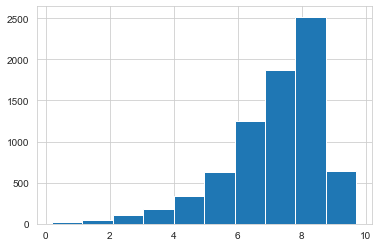

In [323]:
df = df[df['user_score'] > 0]
df['user_score'].hist()

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
H1: Средние пользовательские рейтинги платформ Xbox One и PC различны

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно!

In [324]:
df_xbox_rating = df[df['platform'] == 'X360']['user_score'].sample(n=70)
df_xbox_rating.head()

1556    7.2
4634    8.2
6558    7.5
5539    3.7
8680    3.6
Name: user_score, dtype: float64

<AxesSubplot:>

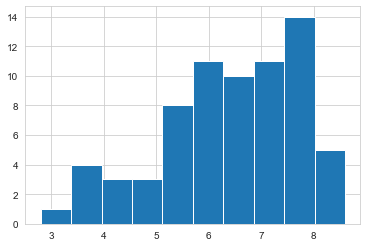

In [325]:
df_xbox_rating.hist()

In [326]:
df_pc_rating = df[df['platform'] == 'PC']['user_score'].sample(n=70)
df_pc_rating.head()

16584    7.9
2829     4.2
15144    8.7
4368     4.7
16549    7.6
Name: user_score, dtype: float64

<AxesSubplot:>

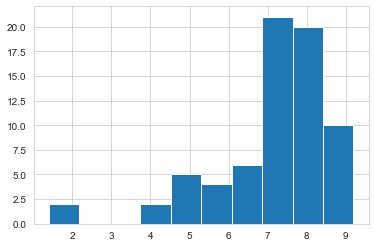

In [327]:
df_pc_rating.hist()

In [328]:
alpha = .05
res = st.ttest_ind(
    df_xbox_rating,
    df_pc_rating
)

print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0019148994741080931
Отвергаем нулевую гипотезу


Вывод: Из полученных данных можно предположить, что ср. пользовательские рейтинги платформ Xbox One и PC одинаковы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим актуальный период и доработаем, хорошО?

### Гипотеза - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Сформулируем гипотезы?

In [329]:
df_action_rating = df[df['genre'] == 'Action']['user_score'].sample(n=70)
df_action_rating.head()

4685    7.9
3175    8.0
679     8.4
2581    6.4
928     9.1
Name: user_score, dtype: float64

<AxesSubplot:>

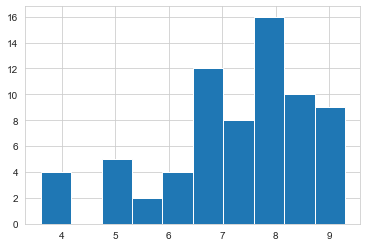

In [330]:
df_action_rating.hist()

In [331]:
df_sports_rating = df[df['genre'] == 'Sports']['user_score'].sample(n=70)
df_sports_rating.head()

11415    7.8
3029     8.8
6504     5.0
8230     7.4
2431     7.0
Name: user_score, dtype: float64

<AxesSubplot:>

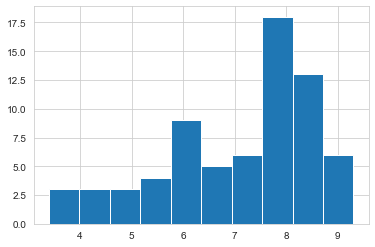

In [332]:
df_sports_rating.hist()

In [333]:
alpha = .05
res = st.ttest_ind(
    df_action_rating,
    df_sports_rating
)

print('p-значение:', res.pvalue)

if res.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4936699067424577
Не получилось отвергнуть нулевую гипотезу


Вывод: из полученных данных можно предположить, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Доработаем тоже, хорошо?

## Шаг 6. Напишите общий вывод

1. Сначала необходимо определится с платформой игры. Стоит заметить что бурный рост продаж начинается в период появления нового поколения консоли, возможно стоит задуматься над тем, чтобы игру создавать сразу для новой платформы.
2. Из анализа видно, что лидирующее место по продаже игр занимают консоли Sony и Microsoft.
3. Стоит отметить что самые популярные жанры выпускаемых игр Action и Sports.
4. Необходимо понять регион для которого будет выпускаться игра. От региона будет зависеть выбор платформы и жанра, особенно есть различия для региона jp.
5. Для глобального рынка можно присмотреться к топ 5 платформ и жанров.
6. Стоит обратить внимание на рейтинг ESRB, игры с рейтингом Е (для всех) являются самыми продаваемыми, кроме региона jp. Данный факт скорее всего можно объяснить региональными особенностями рынка. Так же стоит отметить что на 2-3 месте крепко закрепились игры с рейтингом Т(игры для подростков) и М(игры для взрослых)
7. Тип платформы на рейтинг игры не влияет.
8. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Исправим ошибки выше и доработаем, хорошо?

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
 Александр, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    2. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Неверно подсчитана сумма продаж по годам

    2. Актуальный период определен неверно, что привело к ошибкам в последующим разделах

    3. Не рассмотрены медианные продажи по каждому жанру
    
    
**Удачи и жду твой проект на повторное ревью!**